<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2002%20-%20Aprendizado%20Supervisionado/NAIVE%20BAYES/T%C3%B3pico_02_Aprendizado_Supervisionado_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Naive Bayes

Neste tutorial, vamos explorar o algoritmo Naive Bayes utilizando a biblioteca scikit-learn. O Naive Bayes é um método probabilístico de classificação que assume independência condicional entre os atributos.

O funcionamento do algoritmo se baseia na aplicação do Teorema de Bayes para calcular a probabilidade condicional de uma amostra pertencer a determinada classe, dadas as suas características. 

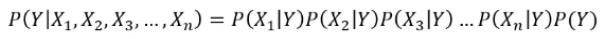

#Dataset Sintético

[-0.10290042  0.46437976  0.77686889  1.31532788  1.75952249 -0.52756421
  0.90835101 -0.43270684] 0


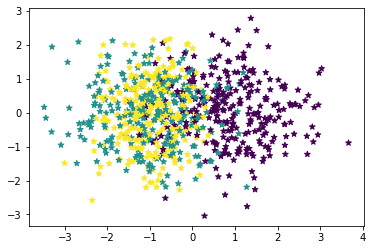

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

#Seed (Garante a reproducibilidade)
random_state = 9999

X, y = make_classification(
    n_features=8,
    n_classes=3,
    n_samples=800,
    n_informative=2,    
    n_clusters_per_class=1,
    random_state=random_state,
)


print(X[0],y[0])
plt.scatter(X[:, 6], X[:, 5], c=y, marker="*");
plt.show()

##Holdout
Ao separar o conjunto de dados em conjuntos de treinamento e teste, podemos treinar o modelo no conjunto de treinamento e avaliar sua capacidade de generalização no conjunto de teste. Se o modelo tiver um desempenho semelhante em ambos os conjuntos, isso indica que o modelo é capaz de generalizar e fazer previsões em novos dados. Caso contrário, se o desempenho do modelo no conjunto de teste for significativamente pior do que no conjunto de treinamento, pode ser um sinal de que o modelo está sobreajustando (overfitting) aos dados de treinamento e não consegue generalizar adequadamente.

Veremos essa análise nas células seguintes. Uma análise mais profunda, é mérito de discussão nas próximas aulas.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)



##Treinando o Modelo

Durante o treinamento do Naive Bayes, são calculadas as probabilidades condicionais de cada atributo dado cada classe. Essas probabilidades são usadas posteriormente para calcular a probabilidade a posteriori de cada classe para um conjunto de atributos dado.

O modelo Naive Bayes assume que todos os atributos são independentes entre si, o que significa que a probabilidade de que ocorra um conjunto de atributos pode ser calculada multiplicando as probabilidades condicionais individuais de cada atributo.

Resumindo, durante o treinamento do Naive Bayes, são calculadas as probabilidades condicionais de cada atributo dado cada classe, que serão utilizadas posteriormente para classificar novas amostras com base na probabilidade a posteriori de cada classe.

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)

print("Train Accuracy:", accuracy)

Train Accuracy: 0.8339552238805971


In [4]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8257575757575758


Analisando a acurácia do treino e teste, nota-se que o modelo generalizou o problema, ainda que com acurácia abaixo de 85%.

In [5]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        97
           1       0.78      0.91      0.84        80
           2       0.77      0.76      0.76        87

    accuracy                           0.83       264
   macro avg       0.83      0.83      0.83       264
weighted avg       0.83      0.83      0.83       264



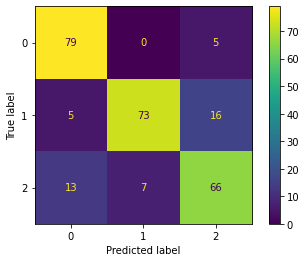

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Dataset de Doenças Cardíacas

Neste exemplo vamos carregar o dataset que determina características de pessoas saudáveis e cardiácas. Também uma análise explorátoria utilizando a biblioteca [pandas](https://pandas.pydata.org/).

In [7]:
import pandas as pd
#download
!wget https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv

#Carregar o csv
df = pd.read_csv('heart.csv')

#Detalhamento dos tipos de dados
df.info()

#Shuffle e mostrar os primeiros 30 elementos
df.sample(frac=1).head(20)

--2023-03-13 00:46:07--  https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2023-03-13 00:46:07 (79.7 MB/s) - ‘heart.csv’ saved [11328/11328]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


A última coluna determina a classe (0 ou 1), sendo que '0' a classe de uma pessoal saudável e 1 para cardíacos

Abaixo, vamos explorar o dataset. Avalie o balanceamento das features vs classes

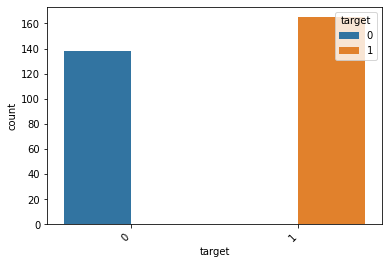

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='target',hue='target')
plt.xticks(rotation=45, ha='right');

##Holdout



In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

##Treinamento


In [10]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train);
y_pred = model.predict(X_train)

Com o modelo treinado, podemos prever a base de teste

In [11]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

y_pred = model.predict(X_test)
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        36
           1       0.95      0.83      0.88        64

    accuracy                           0.86       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.88      0.86      0.86       100



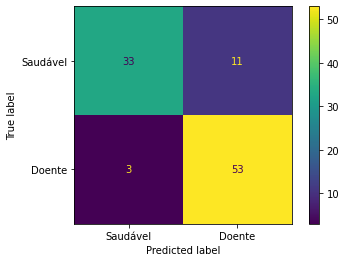

In [12]:
labels = ["Saudável", "Doente"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

É importante ilustrar, que também é possivel prever uma única amostra
Neste caso, ilustramos também o uso de vetor numpy

In [13]:
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()
print(X_test_np.shape)

i=0
amostra_teste  = X_test_np[i]

print("Sample: ", amostra_teste)
print("Target: ", y_test_np[i])
pred = model.predict([amostra_teste])
print("Predicted Class: ", pred)



(100, 13)
Sample:  [ 62.    0.    0.  138.  294.    1.    1.  106.    0.    1.9   1.    3.
   2. ]
Target:  0
Predicted Class:  [0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#Dataset de Emprestímo Bancário
Agora vamos treinar um Naive Bayes com um dataset que determina a probabilidade de uma pessoa quitar o seu emprestímo.

A descrição das variavéis é dado como segue:

*credit_policy: 1 se o cliente atender aos critérios de concessão de crédito do LendingClub.com e 0 caso contrário.

*purpose: O objetivo do empréstimo, como por exemplo: cartão de crédito, consolidação de dívidas, etc.

*int_rate: A taxa de juros do empréstimo (proporção).

*installment: As parcelas mensais ($) devidas pelo mutuário se o empréstimo for financiado.

*log_annual_inc: O log natural da renda anual do mutuário.

*dti: A relação dívida-renda do mutuário.

*fico: A pontuação de crédito FICO do mutuário.

*days_with_cr_line: O número de dias que o mutuário tem tido uma linha de crédito.

*revol_bal: O saldo rotativo do mutuário.

*revol_util: A taxa de utilização da linha rotativa do mutuário.

*inq_last_6mths: O número de consultas feitas por credores nos últimos 6 meses pelo mutuário.

*delinq_2yrs: O número de vezes que o mutuário ficou mais de 30 dias inadimplente em um pagamento nos últimos 2 anos.

*pub_rec: O número de registros públicos prejudiciais ao crédito do mutuário.

*not_fully_paid: Indica se o empréstimo não foi pago integralmente (o mutuário inadimpliu ou foi considerado improvável de pagar). Sendo 0 para quem quitou e 1 para quem não quitou

In [14]:
import pandas as pd
#download
!wget https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/loan_data.csv

#Carregar o csv
df = pd.read_csv('loan_data.csv')

#Detalhamento dos tipos de dados
df.info()

#Shuffle e mostrar os primeiros 30 elementos
df.sample(frac=1).head(30)

--2023-03-13 00:46:08--  https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/loan_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 751253 (734K) [text/plain]
Saving to: ‘loan_data.csv’

loan_data.csv       100%[===================>] 733.65K  --.-KB/s    in 0.04s   

2023-03-13 00:46:09 (16.0 MB/s) - ‘loan_data.csv’ saved [751253/751253]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-n

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1046,1,home_improvement,0.0832,149.55,10.645425,5.49,747,13259.958330,398,1.2,3,2,0,1
7855,0,all_other,0.1122,118.24,10.819778,2.86,667,181.000000,736,51.3,2,0,0,0
4117,1,all_other,0.1496,297.95,10.505068,18.58,682,1110.000000,8559,41.0,1,0,0,0
7300,1,major_purchase,0.0751,130.66,10.596635,15.57,742,2340.041667,1801,62.1,2,0,0,0
9526,0,credit_card,0.0788,437.93,11.820410,15.87,757,6720.041667,232755,23.0,0,0,0,0
4808,1,debt_consolidation,0.1357,467.07,11.982929,9.43,692,5820.000000,105576,68.6,0,0,1,0
897,1,debt_consolidation,0.1292,175.01,11.326596,14.24,707,8670.000000,56002,73.8,0,0,0,0
6622,1,debt_consolidation,0.1287,50.45,9.798127,19.80,687,2340.041667,6454,86.1,0,0,0,0
8207,0,credit_card,0.1141,164.67,10.325482,0.39,677,183.041667,397,39.7,1,0,0,0
8803,0,all_other,0.1538,51.41,10.575442,21.66,647,3509.958333,3975,81.1,4,0,0,0


Nota-se que apenas o campo 'purpose' é categórico. Dado que o dataset possui dados contínuos (não categóricos), precisamos converter este dado.

Um exemplo geral de converter dados catégoricos em númericos em scikit-learn é dado abaixo. Neste caso, a característica de cor é apresentada.






In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

#Lista de 1-Coluna
features = [['blue'],['red'],['white'],['red']]
print(features)

encoder = OneHotEncoder() 
encoder.fit(features)
encoded_features = encoder.transform(features)
print(encoded_features.toarray())

#Múltiplas colunas e apenas 1 categorica
features = [[1.8,'blue',4],
            [2.0,'red',2],
            [1.0,'white',2],
            [1.5,'red',4]]


print(features)

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
features_encoded = np.array(ct.fit_transform(features))
print(features_encoded)         


[['blue'], ['red'], ['white'], ['red']]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[1.8, 'blue', 4], [2.0, 'red', 2], [1.0, 'white', 2], [1.5, 'red', 4]]
[[1.0 0.0 0.0 1.8 4]
 [0.0 1.0 0.0 2.0 2]
 [0.0 0.0 1.0 1.0 2]
 [0.0 1.0 0.0 1.5 4]]


De forma similar, podemos utilizar a função 'get_dummies' do pandas. Neste caso, voltamos a nossa base de empréstimo bancário.

In [16]:
df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


##Holdout, Treino e Teste

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3031
           1       0.09      0.35      0.14       130

    accuracy                           0.82      3161
   macro avg       0.53      0.60      0.52      3161
weighted avg       0.93      0.82      0.87      3161



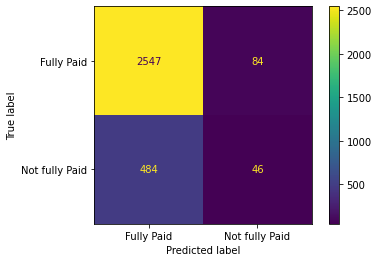

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train);

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

y_pred = model.predict(X_test)

report = classification_report(y_pred, y_test)

print(report)

labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

* O que aconteceu com o modelo acima? 

* Porque o modelo tende a classificar as amostras como "Fully paid" ?